# Random Forest Classifier

## Get dataset

In [ ]:
from finlab.ml import fundamental_features
dataset = fundamental_features()
dataset = dataset.dropna(thresh=int(len(dataset)*0.5), axis=1).dropna(how='any')
dataset.head()

## Add labels

In [ ]:
features = dataset.columns

import finlab.ml as ml

ml.add_profit_prediction(dataset)
dataset = dataset.dropna()
dataset.head()

## Split Train Test dataset

In [23]:
select = dataset.index.get_level_values('date') < '2021'
dataset_train = dataset[select]
dataset_test = dataset[~select]

## Training

In [24]:
from sklearn.ensemble import RandomForestClassifier

cf = RandomForestClassifier(200)
cf.fit(dataset_train[features], dataset_train['return'] > 1)

RandomForestClassifier(n_estimators=200)

## Prediction

In [25]:
import pandas as pd
prediction = cf.predict(dataset_test[features])

## Backtest

<AxesSubplot:xlabel='date'>

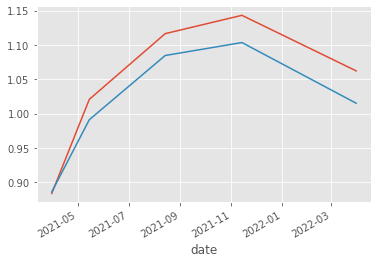

In [26]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

returns1 = dataset_test['return'][prediction == True]
dates = returns1.index.get_level_values('date')
returns1.groupby(dates).mean().cumprod().plot()

returns2 = dataset_test['return'][prediction == False]
dates = returns2.index.get_level_values('date')
returns2.groupby(dates).mean().cumprod().plot()

## Feature Importance

In [27]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance

R409_淨值成長率         0.028375
R408_資產總額成長率       0.025933
R401_營收成長率         0.025348
R403_營業利益成長率       0.024286
R203_研究發展費用率       0.023751
R112_業外收支營收率       0.023631
R69B_自由現金流量        0.023301
R402_營業毛利成長率       0.022930
R503_利息支出率         0.022909
R610_存貨週轉率         0.022294
R303_每股現金流量        0.022259
R101_ROA稅後息前       0.022126
R205_現金流量比率        0.021954
T7324取得不動產廠房及設備    0.021886
R105_營業毛利率         0.021832
R404_稅前淨利成長率       0.021519
R179_貝里比率          0.021472
R612_固定資產週轉次數      0.021199
R405_稅後淨利成長率       0.020900
R406_經常利益成長率       0.020847
T7210營運現金流         0.020797
T7211折舊            0.020561
R305_每股營業利益        0.020347
R607_總資產週轉次數       0.020191
R501_流動比率          0.020159
R106_營業利益率         0.020154
R502_速動比率          0.020150
T3395營業利益          0.020119
R145_稅前息前折舊前淨利率    0.019882
R103_ROE稅後         0.019666
R11V_ROA綜合損益       0.019653
R304_每股營業額         0.019645
R678_營運資金          0.019635
R11U_ROE綜合損益       0.019612
R613_淨值週轉率次        0.019374
T3950歸屬母公司淨利       0

## New Strategy using feature importance

In [28]:
from finlab.data import Data
data = Data()
close = data.get('收盤價')
sma = close.rolling(60, min_periods=10).mean()
bias = close / sma

ml.add_feature(dataset, 'bias', bias)
dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R502_速動比率  R503_利息支出率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...  101.776758   -9.792979   
         2014-08-14     -0.952778      0.152556  ...   91.450337  -17.435186   
         2014-11-14     -0.948101      2.168353  ...   93.976558  -17.800651   
         2015-03-31     -1.265106      3.002608  ...  117.966121  -13.169666   
         2015-05-15     -2.315297      0.069454  ...  109.303861   -7.153186   

                      R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  R612_固定資產週轉次數  \
stock_id date                                                              
1101     2014-05-15  17732671.0      0.093998    2.191306       0.245688   
         2014-08-14   7972516.0      0.112552    2.381079       0.297377   
         2014-11-14  10552354.0      0.106864    2.306032       0.282283   
         2015-03-31  27973772.0      0.103034    2.268994       0.275197   
         2015-05-15  22891238.0      0.073611    1.817298       0.195713   

                     R613_淨值週轉率次  R69B_自由現金流量    return      bias  
stock_id date                                                      
1101     2014-05-15     0.171327    4901868.0  1.073347  0.960967  
         2014-08-14     0.208493   16542181.0  0.984816  1.021982  
         2014-11-14     0.200028    4768224.0  0.969163  0.971380  
         2015-03-31     0.187942  -10525322.0  0.956818  1.040769  
         2015-05-15     0.132250    8494249.0  0.850077  0.988372  

[5 rows x 50 columns]

<AxesSubplot:xlabel='date'>

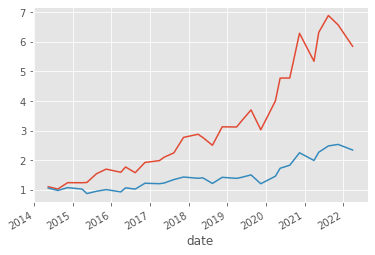

In [29]:
items = list(importance.index[:20])

def select(df):
    rank = df[items].rank(pct=True).sum(axis=1)
    return df[rank > rank.quantile(0.9)]['return'][df['bias'] > 1].mean()

dates = dataset.index.get_level_values('date')
dataset.groupby(dates).apply(select).cumprod().plot()
dataset['return'].groupby(dates).mean().cumprod().plot()